## Option 1: Pyber

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.

### Three observable trends based on the data
- urban cities tend to have a lower average fare than suburban and rural types, but urban cities have more total rides of all the types
- suburban drivers make up less than 13% of the total number of drivers, but suburban fares make up 30% of the total fares.
- rural drivers only make up 1% the driver population and account for 5% of the total rides and 6% of the total fares.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
city_data = os.path.join('raw_data','city_data.csv')
ride_data = os.path.join('raw_data','ride_data.csv')

citydata_df = pd.read_csv(city_data)
#using drop duplicates to remove duplicate 'Port James' entry in city_data. Is there a better way?
citydata_df = citydata_df.drop_duplicates(['city'])
ridedata_df = pd.read_csv(ride_data)

cityheaders = list(citydata_df) #['city', 'driver_count', 'type']
rideheaders = list(ridedata_df) #['city', 'date', 'fare', 'ride_id']

In [3]:
cr_merge_df = pd.merge(ridedata_df, citydata_df, how='left', on='city')
cr_merge_df.head(3)

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban


In [4]:
citycount = len(cr_merge_df['city'].unique())
citycount

125

In [5]:
#Data across all cities

#Average Fare ($) Per City
avgfare = cr_merge_df.groupby(['city']).mean()['fare']

#Total Number of Rides Per City
ridespercity = cr_merge_df['city'].value_counts()

#Total Number of Drivers Per City
driverspercity = (cr_merge_df.groupby(['city']).sum()['driver_count'])/ridespercity

#City Type (Urban, Suburban, Rural) (count is the number of rides)
citytype = cr_merge_df.set_index(['city'])['type'].value_counts()

#Unique list of the types of cities
citytypelist = list(cr_merge_df['type'].unique())
citytypelist

['Urban', 'Suburban', 'Rural']

In [6]:
#set up city type dfs
urban_df = cr_merge_df[(cr_merge_df['type']=='Urban')]
suburban_df = cr_merge_df[(cr_merge_df['type']=='Suburban')]
rural_df = cr_merge_df[(cr_merge_df['type']=='Rural')]

#set up average fare, rides, and drivers for each city type
ur_avgfare = urban_df.groupby(['city']).mean()['fare']
ur_ridespercity = urban_df['city'].value_counts()
ur_driverspercity = (urban_df.groupby(['city']).sum()['driver_count'])/ur_ridespercity

su_avgfare = suburban_df.groupby(['city']).mean()['fare']
su_ridespercity = suburban_df['city'].value_counts()
su_driverspercity = (suburban_df.groupby(['city']).sum()['driver_count'])/su_ridespercity

ru_avgfare = rural_df.groupby(['city']).mean()['fare']
ru_ridespercity = rural_df['city'].value_counts()
ru_driverspercity = (rural_df.groupby(['city']).sum()['driver_count'])/ru_ridespercity

In [7]:
# normalize the driver count across the types (all values between 0-1)
ur_driversnormalized = (ur_driverspercity-min(driverspercity))/(max(driverspercity)-min(driverspercity))
su_driversnormalized = (su_driverspercity-min(driverspercity))/(max(driverspercity)-min(driverspercity))
ru_driversnormalized = (ru_driverspercity-min(driverspercity))/(max(driverspercity)-min(driverspercity))

# use normalized counts to convert to circle size (area = pi*radius^2)
ur_area = np.pi*(ur_driversnormalized)**2
su_area = np.pi*(su_driversnormalized)**2
ru_area = np.pi*(ru_driversnormalized)**2

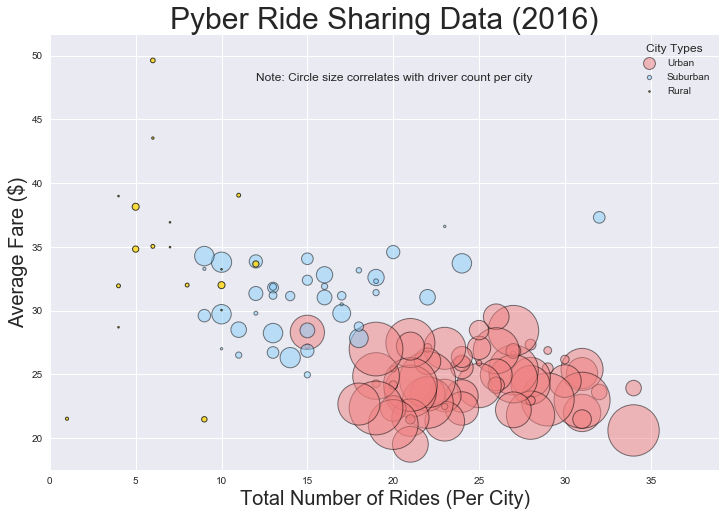

In [20]:
# Set up plot and labels format
sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.title("Pyber Ride Sharing Data (2016)", fontsize=30)
plt.xlim(0,max(ridespercity)+5)
plt.ylim(min(avgfare)-2,max(avgfare)+2)
plt.xlabel("Total Number of Rides (Per City)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=20)
plt.text(12,48, 'Note: Circle size correlates with driver count per city')

# plot the 3 datasets
plt.scatter(x=ur_ridespercity, y=ur_avgfare, s=ur_area*1000, label="Urban", alpha=0.5, color='lightcoral', edgecolor='black', linewidth=1)
plt.scatter(x=su_ridespercity, y=su_avgfare, s=su_area*1000, label="Suburban", alpha=0.5, color='lightskyblue', edgecolor='black', linewidth=1)
plt.scatter(x=ru_ridespercity, y=ru_avgfare, s=ru_area*1000, label="Rural", alpha=0.75, color='gold', edgecolor='black', linewidth=1)

plt.legend(labels=citytypelist, loc="best", fontsize=10, title="City Types", markerscale=0.3, fancybox=True, edgecolor='black')
plt.show()

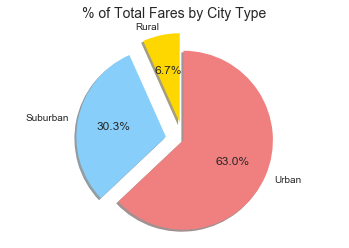

In [37]:
# % of Total Fares by City Type
expl = (0.2,0.2,0)
ftotal = cr_merge_df.groupby(['type']).sum()['fare']
faretotal_df = pd.DataFrame({'type':ftotal.index, 'faretotal':ftotal.values})

fig1, ax1 = plt.subplots()
ax1.pie(faretotal_df['faretotal'], explode=expl, labels=faretotal_df['type'], autopct='%1.1f%%', shadow=True, startangle=90, colors=['gold','lightskyblue','lightcoral'])
ax1.axis('equal')
plt.title('% of Total Fares by City Type', fontsize=14)
plt.show()

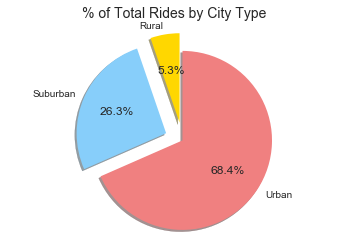

In [39]:
# % of Total Rides by City Type

rtotal = cr_merge_df.groupby(['type']).size()
ridetotal_df = pd.DataFrame({'type':rtotal.index, 'ridetotal':rtotal.values})

fig2, ax2 = plt.subplots()
ax2.pie(ridetotal_df['ridetotal'], explode=expl, labels=ridetotal_df['type'], autopct='%1.1f%%', shadow=True, startangle=90, colors=['gold','lightskyblue','lightcoral'])
ax2.axis('equal')
plt.title('% of Total Rides by City Type', fontsize=14)
plt.show()

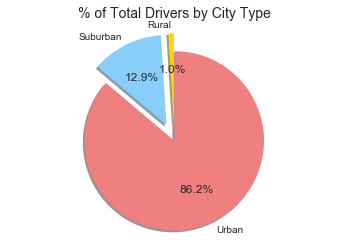

In [42]:
# % of Total Drivers by City Type

dtotal = cr_merge_df.groupby(['type']).sum()['driver_count']
drivertotal_df = pd.DataFrame({'type':dtotal.index, 'drivertotal':dtotal.values})

fig3, ax3 = plt.subplots()
ax3.pie(drivertotal_df['drivertotal'], explode=expl, labels=drivertotal_df['type'], autopct='%1.1f%%', shadow=True, startangle=90, colors=['gold','lightskyblue','lightcoral'])
ax3.axis('equal')
plt.title('% of Total Drivers by City Type', fontsize=14)
plt.show()